In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5ff17c6f54fd23191499c7017d6366538fcc35b61d0225390f78827c662577ddcc8d5d64ddf58c68c56d6ad68e5721930a5b7a5803b0bee173'

In [2]:
import aocd
from aocd.models import Puzzle
day = 21
year = 2023
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [379]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [5]:
test_data = """...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
..........."""
data_test = test_data.splitlines()

In [6]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(131,
 ['...................................................................................................................................',
  '.......#.......#...#....#.........##.#.#.............#....#.#.............#.#...............#.....#......#.#.............#.........',
  '....#...........#..##......#.#.....................#....................#.....#............#..#......#...............#.#.........#.',
  '......................##......#...###.#.#.....#.....#...................#......#.......#...#.......#...............#.............#.',
  '.......#.#.#.....##..##..................#.#...........#..........................#......#..##.#.......#..........#..#.....#..#..#.',
  '...#..#.......#.....#..#...........#..#.....#.......##......................#............#..........#.#.#.#..#......##.#...........',
  '..#........#..#..........#...#.......#..#.#..#.##...#.............#..........##.#....#.......#....#......#....#.#......#....#....#.',
  '..#......#.#...###..#....#......

In [27]:
def parse(data):
    pos = complex(0)
    garden = {}
    start = 0
    X = Y = 0
    for line in data:
        for c in line:
            if c == 'S': 
                start = pos
                garden[pos] = '.'
            else:
                garden[pos] = c
            pos += 1
        X = int(pos.real)
        pos = complex(0, pos.imag+1)
    Y = int(pos.imag)
    return start, garden, X, Y

def walk(start, garden, n=64):
    pos = set([start])
    for i in range(n):
        new_pos = set()
        for p in pos:
            for nbr in [-1, +1, +1j, -1j]:
                np = p + nbr
                if garden.get(np, 0) == '.':
                    new_pos.add(np)
        pos = new_pos
    return pos

In [291]:
start, garden, X, Y = parse(data_test)
start, garden, X, Y = parse(data)
start

(65+65j)

In [292]:
f = sum([x=='.' for x in garden.values()]) / (X*Y)

In [311]:
pos = walk(start, garden, n=64)

In [313]:
len(pos)

3562

In [22]:
len(pos)

3562

In [23]:
puzzle.answer_a = len(pos)

That's the right answer!  You are one gold star closer to restoring snow operations. [Continue to Part Two]


In [451]:
def walk_b(start, garden, X, Y, n=64):
    res = [1]
    pos = set([start])
    posA = set()
    posB = set()
    state = True
    for i in range(n):
        new_pos = set()
        for p in pos:
            for nbr in [-1, +1, +1j, -1j]:
                np = p + nbr
                if garden.get(complex(np.real % X, np.imag % Y), 0) == '.':
                    new_pos.add(np)
        if state:
            new_pos = new_pos - posA
            posA |= new_pos
            res.append(len(posA))

            # print('A ', new_pos, posA)
        else:
            new_pos = new_pos - posB
            posB |= new_pos
            res.append(len(posB))
            # print('B ', new_pos, posB)
        state = not state
        pos = new_pos #- drop_out
        # res.append(len(pos))
        # print(new_pos)
    return res

In [370]:
start, garden, X, Y = parse(data_test)
start, garden, X, Y = parse(data)
start, X, Y

((65+65j), 131, 131)

In [371]:
full_odd = len(walk(start, garden, n=131))
full_even = len(walk(start, garden, n=132))
full_odd, full_even

(7226, 7257)

In [372]:
nsteps = 26501365
nfull = (nsteps - 65) // 131

In [374]:
nfull

202300

In [ ]:
202299 

In [375]:
65 + 8 * 131

1113

In [452]:
res = walk_b(start, garden, X, Y, n=65 + 8 * 131+1)

In [ ]:
# tiles = a*x^2 + b*x + c

a*N^2 + b*N + c = res[65+131*2*N]

In [462]:
a = ([4, 2, 1], [9, 3, 1], [16, 4, 1])
b = [res[65+131*2*x] for x in range(2, 5)]
coeff = np.linalg.solve(a, b)
coeff

array([57932., 29206.,  3682.])

In [463]:
b

[293822, 612688, 1047418]

In [464]:
def solve(x, coeff):
    return int(coeff[0])*x**2+ int(coeff[1])*x + int(coeff[2])

In [466]:
[solve(n, coeff) for n in range(1, 5)]

[90820, 293822, 612688, 1047418]

In [468]:
# N = nfull // 2
ans = solve(nfull//2, coeff)
ans

592723929260582

In [469]:
puzzle.answer_b = ans

That's the right answer!  You are one gold star closer to restoring snow operations.You have completed Day 21! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


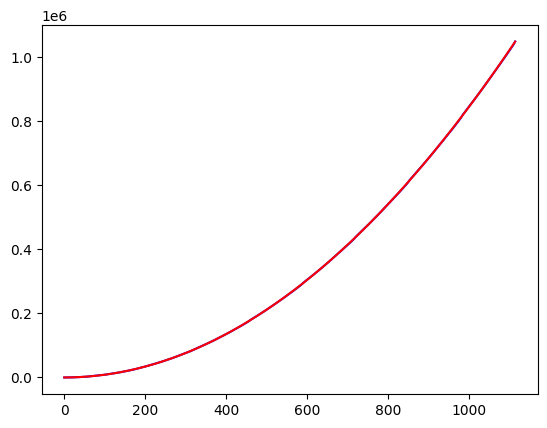

In [470]:
plt.plot(res, color='b')
x = range(len(res))
y = [solve((x-65)/(131*2), coeff) for x in range(len(res))]
plt.plot(y, color='r')